In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:06<00:00, 258MB/s]
100% 1.06G/1.06G [00:06<00:00, 167MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
# generators: it will divide our data into batches and uses one batch at a time by bringing in RAM
            # these help in processing large datas

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalizing: from 0-255 to 0-1

def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [7]:
# # create CNN model

# model = Sequential()

# model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# model.add(Flatten())

# model.add(Dense(128,activation='relu'))
# model.add(Dense(64,activation='relu'))
# model.add(Dense(1,activation='sigmoid'))

In [8]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [9]:
# create CNN model Using DropOut and Batch Normalization to reduce overfitting

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [11]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
history = model.fit(train_ds, epochs = 10, validation_data = test_ds)

Epoch 1/10
625/625 [==============================] - 82s 107ms/step - loss: 1.2768 - accuracy: 0.5784 - val_loss: 0.6458 - val_accuracy: 0.6518
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.6523 - accuracy: 0.6270 - val_loss: 0.5841 - val_accuracy: 0.6762
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5612 - accuracy: 0.6948 - val_loss: 0.5309 - val_accuracy: 0.7480
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4878 - accuracy: 0.7487 - val_loss: 0.4502 - val_accuracy: 0.7892
Epoch 5/10
625/625 [==============================] - 64s 103ms/step - loss: 0.4433 - accuracy: 0.7796 - val_loss: 0.4569 - val_accuracy: 0.7918
Epoch 6/10
625/625 [==============================] - 64s 103ms/step - loss: 0.3863 - accuracy: 0.8116 - val_loss: 0.4382 - val_accuracy: 0.8064
Epoch 7/10
625/625 [==============================] - 66s 104ms/step - loss: 0.3250 - accuracy: 0.8460 - val_loss: 0.4716 - val_ac

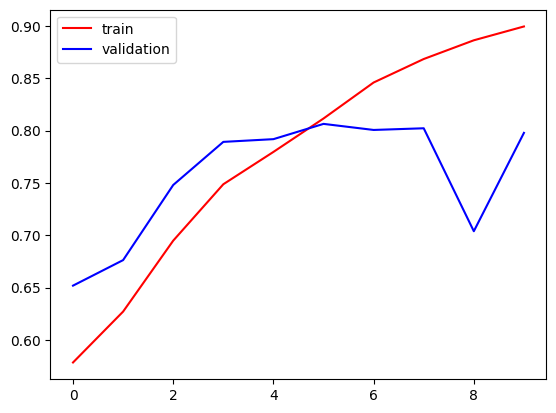

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

# Results would be different when overfiting is not removed

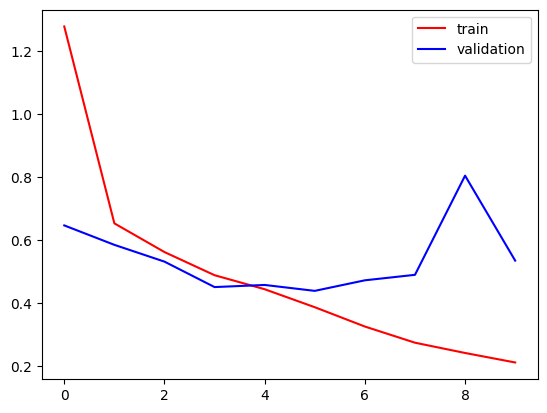

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# Results would be different when overfiting is not removed

# Testing individual photos

In [15]:
import cv2

In [18]:
test_img = cv2.imread('/content/pxfuel.jpg')

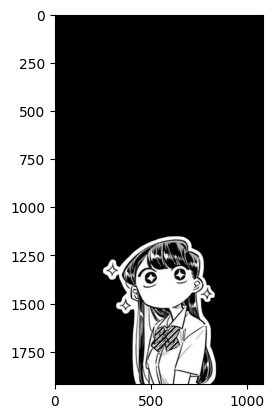

In [19]:
plt.imshow(test_img)

In [20]:
test_img.shape

(1920, 1080, 3)

In [21]:
test_img = cv2.resize(test_img,(256,256))

In [22]:
test_input = test_img.reshape((1,256,256,3))

In [23]:
model.predict(test_input)

1/1 [==============================] - 0s 247ms/step


array([[1.]], dtype=float32)